## Analysis of a Car Sell Dataset Part 2

There are two goals in the second analysis task: (1), train linear regression models to predict the selling prices of cars; (2) assess the data ethics issues. There are *7* questions in this portfolio. 

The first goal involves a standard Data Science workflow: exploring data, building models, making predictions, and evaluating results. In this task, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. We will use another cleaned car_sells sub-dataset that **is different from** the one in “Analysis of a Car Sell Dataset” task 1. This goal covers Questions *1-6*. 

Question *7* is about data ethics issue.

In [5]:
your_name = "Likitha Vankadoth"
your_student_id = "48722553"

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

### Q1: Import Cleaned Car Sell Dataset
The csv file named 'car_sells_clean_data.csv' is provided. You may need to use the Pandas method, i.e., `read_csv`, for reading it. After that, please print out its total length.

In [7]:
car_sells_cleaned = pd.read_csv('car_sells_clean_data.csv')

print(car_sells_cleaned.shape)
print(len(car_sells_cleaned))

(3657, 8)
3657


### Q2: Explore the Dataset

* Use the methods, i.e., `head()` and `info()`, to have a rough picture about the data, e.g., how many columns, and the data types of each column.
* As our goal is to predict cars' selling prices given other columns, please get the correlations between year/km_driven/seller_type/fuel/owner and selling_price by using the `corr()` method.
* To get the correlations between different features, you may need to first convert the categorical features (i.e., seller_type and owner) into numerial values. For doing this, you may need to import `OrdinalEncoder` from `sklearn.preprocessing` (refer to the useful exmaples [here](https://pbpython.com/categorical-encoding.html))
* Please provide ___necessary explanations/analysis___ on the correlations, and figure out which are the ___most___ and ___least___ corrleated features regarding selling_price. Try to ___discuss___ how the correlation will affect the final prediction results, if we use these features to train a regression model for selling_price prediction. In what follows, we will conduct experiments to verify your hypothesis.

In [8]:
car_sells_cleaned.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007.0,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007.0,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012.0,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017.0,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014.0,450000,141000,Diesel,Individual,Manual,Second Owner


In [9]:
car_sells_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3657 entries, 0 to 3656
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           3657 non-null   object 
 1   year           3657 non-null   float64
 2   selling_price  3657 non-null   int64  
 3   km_driven      3657 non-null   int64  
 4   fuel           3657 non-null   object 
 5   seller_type    3657 non-null   object 
 6   transmission   3657 non-null   object 
 7   owner          3657 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 228.7+ KB


In [11]:
car_sells_cleaned.describe()

,year,selling_price,km_driven
count,3657.000000,3.657000e+03,3657.000000
mean,2013.123599,4.945088e+05,66560.660924
std,4.119128,5.579230e+05,47007.819292
min,1995.000000,2.000000e+04,1.000000
25%,2011.000000,2.100000e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [12]:
car_sells_cleaned.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

### Q3: Split Training and Testing Data
* Machine learning models are trained to help make predictions for the future. Normally, we need to randomly split the dataset into training and testing sets, where we use the training set to train the model, and then leverage the well-trained model to make predictions on the testing set.
* To further investigate whether the size of the training/testing data affects the model performance, please randomly split the data into training and testing sets with different sizes:
    * Case 1: training data containing 10% of the entire data;
    * Case 2: training data containing 90% of the entire data.
* Print the shape of training and testing sets in the two cases.

In [13]:
#2.2 Encoding
from sklearn.preprocessing import OrdinalEncoder
ordinal_enco=OrdinalEncoder()
#encoding the "fuel" to "fuel_code"
car_sells_cleaned["fuel_code"]=ordinal_enco.fit_transform(car_sells_cleaned[["fuel"]])
car_sells_cleaned[["fuel","fuel_code"]].head(10)
#encoding for seller_type
car_sells_cleaned["seller_type_code"]=ordinal_enco.fit_transform(car_sells_cleaned[["seller_type"]])
car_sells_cleaned[["seller_type","seller_type_code"]].head(10)
#encoding for "owner"
car_sells_cleaned["owner_code"]=ordinal_enco.fit_transform(car_sells_cleaned[["owner"]])
car_sells_cleaned[["owner","owner_code"]].head(10)

,owner,owner_code
0,First Owner,0.0
1,First Owner,0.0
2,First Owner,0.0
3,First Owner,0.0
4,Second Owner,1.0
5,First Owner,0.0
6,Second Owner,1.0
7,First Owner,0.0
8,First Owner,0.0
9,First Owner,0.0


In [15]:
#year and selling_price

correlation_year_price=car_sells_cleaned["year"].corr(car_sells_cleaned["selling_price"])
print("correlation between year and price is:", correlation_year_price)
#km driven and selling price
correlation_km_price=car_sells_cleaned["km_driven"].corr(car_sells_cleaned["selling_price"])
print("correlation between km_driven and price is:", correlation_km_price)
#fuel and selling_price
correlation_fuel_price =car_sells_cleaned["fuel_code"].corr(car_sells_cleaned["selling_price"])
print("correlation between fuel and price is:", correlation_fuel_price)
#seller_type and selling_price
correlation_seller_price=car_sells_cleaned["seller_type_code"].corr(car_sells_cleaned["selling_price"])
print("correlation between seller_type and price is:", correlation_seller_price)
#owner and selling_price
correlation_owner_price=car_sells_cleaned["owner_code"].corr(car_sells_cleaned["selling_price"])
print("correlation between owner and price is:", correlation_owner_price)
correlation_selling_price=car_sells_cleaned["selling_price"].corr(car_sells_cleaned["selling_price"])
print("correlation between selling price and selling price is:", correlation_selling_price)




correlation between year and price is: 0.41110276220633124
correlation between km_driven and price is: -0.17720277985723884
correlation between fuel and price is: -0.2776270434173492
correlation between seller_type and price is: -0.20863704840276948
correlation between owner and price is: -0.2055235873112245
correlation between selling price and selling price is: 1.0


### Q4: Train Linear Regression Models with Feature Selection under Cases 1 & 2
* When training a machine learning model for prediction, we may need to select the most important/correlated input features for more accurate results.
* To investigate whether feature selection affects the model performance, please select two most correlated features and two least correlated features regarding selling_price, respectively.
* Train four linear regression models by following the conditions:
    - (model-a) using the training/testing data in case 1 with two most correlated input features
    - (model-b) using the training/testing data in case 1 with two least correlated input features
    - (model-c) using the training/testing data in case 2 with two most correlated input features
    - (model-d) using the training/testing data in case 2 with two least correlated input features
* By doing this, we can verify the impacts of the size of traing/testing data on the model performance via comparing model-a and model-c (or model-b and model-d); meanwhile the impacts of feature selection can be validated via comparing model-a and model-b (or model-c and model-d).    

In [16]:
# case 1
train_case1, test_case1=train_test_split(car_sells_cleaned, test_size=0.9, random_state=42)
print(car_sells_cleaned.shape)
print(train_case1.shape)
print(test_case1.shape)

(3657, 11)
(365, 11)
(3292, 11)


In [17]:
#case2
train_case2, test_case2 = train_test_split(car_sells_cleaned, test_size=0.1, random_state=42)
print(car_sells_cleaned.shape)
print(train_case2.shape)
print(test_case2.shape)

(3657, 11)
(3291, 11)
(366, 11)


In [18]:
# model a, dataset case 1, 2 most correalated input features(from question 2)

lr_a = linear_model.LinearRegression()
x_train_a = train_case1[["fuel_code","year"]] #check once
y_train_a = train_case1["selling_price"]
x_test_a = test_case1[["fuel_code","year"]]
y_test_a = test_case1["selling_price"]
lr_a.fit(x_train_a,y_train_a)

# model b, dataset case 1, 2 most correalated input features(from question 2)
lr_b = linear_model.LinearRegression()
x_train_b = train_case1[["km_driven","seller_type_code"]] #check once
y_train_b = train_case1["selling_price"]
x_test_b = test_case1[["km_driven","seller_type_code"]]
y_test_b = test_case1["selling_price"]
lr_b.fit(x_train_b,y_train_b)
# model c, dataset case 1, 2 most correalated input features(from question 2)
lr_c = linear_model.LinearRegression()
x_train_c = train_case2[["fuel_code","year"]] #check once
y_train_c = train_case2["selling_price"]
x_test_c = test_case2[["fuel_code","year"]]
y_test_c = test_case2["selling_price"]
lr_c.fit(x_train_c,y_train_c)
# model d, dataset case 1, 2 most correalated input features(from question 2)
lr_d = linear_model.LinearRegression()
x_train_d = train_case2[["km_driven","seller_type_code"]]
y_train_d = train_case2["selling_price"] #check once
x_test_d = test_case2[["km_driven","seller_type_code"]]
y_test_d = test_case2["selling_price"]
lr_d.fit(x_train_d,y_train_d)

LinearRegression()

### Q5: Evaluate Models
* Evaluate the performance of the four models with two metrics, including MSE and Root MSE
* Print the results of the four models regarding the two metrics

In [19]:
from sklearn.metrics import mean_squared_error  #mean_square_error was renamed to mean_squared_error
# MSE and RMSE for model a
predicted_a=lr_a.predict(x_test_a)
mse_a=mean_squared_error(y_test_a,predicted_a)
rmse_a=np.sqrt(mse_a)
print("The mse for model a is:",mse_a)
print("The rmse for model a is:",rmse_a)

The mse for model a is: 240873725575.0944
The rmse for model a is: 490788.88085926964


In [20]:
# MSE and RMSE for model b
predicted_b=lr_b.predict(x_test_b)
mse_b=mean_squared_error(y_test_b,predicted_b)
rmse_b=np.sqrt(mse_b)
print("The mse for model b is:",mse_b)
print("The rmse for model b is:",rmse_b)

The mse for model b is: 293974338695.7127
The rmse for model b is: 542194.0046659615


In [21]:
# MSE and RMSE for model c
predicted_c=lr_c.predict(x_test_c)
mse_c=mean_squared_error(y_test_c,predicted_c)
rmse_c=np.sqrt(mse_c)
print("The mse for model c is:",mse_c)
print("The rmse for model c is:",rmse_c)

The mse for model c is: 141350876932.57758
The rmse for model c is: 375966.5901813319


In [22]:
# MSE and RMSE for model d
predicted_d=lr_d.predict(x_test_d)
mse_d=mean_squared_error(y_test_d,predicted_d)
rmse_d=np.sqrt(mse_d)
print("The mse for model d is:",mse_d)
print("The rmse for model d is:",rmse_d)

The mse for model d is: 200307720224.895
The rmse for model d is: 447557.5049363992


### Q6: Visualize, Compare and Analyze the Results
* Visulize the results, and perform ___insightful analysis___ on the obtained results. For better visualization, you may need to carefully set the scale for the y-axis.
* Normally, the model trained with most correlated features and more training data will get better results. Do you obtain the similar observations? If not, please ___explain the possible reasons___.

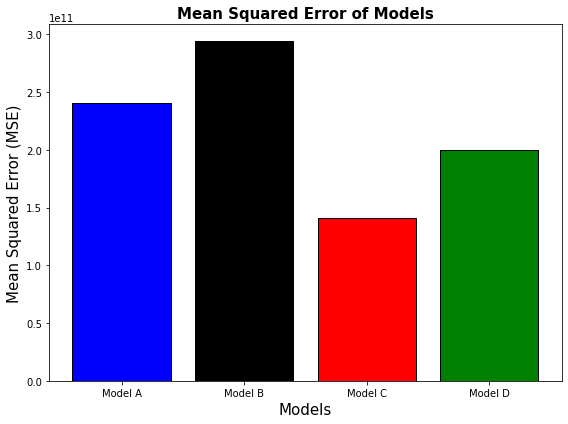

In [23]:
import matplotlib.pyplot as plt

# Sample data
y_axis = [mse_a, mse_b, mse_c, mse_d]
x_axis = ["Model A", "Model B", "Model C", "Model D"]

# Create a bar chart with enhancements
plt.figure(figsize=(8, 6))  # Set the figure size
bars = plt.bar(x_axis, y_axis, color=['blue', 'black', 'red', 'green'], edgecolor='black')

# Add titles and labels
plt.title('Mean Squared Error of Models', fontsize=15, fontweight='bold')
plt.xlabel('Models', fontsize=15)
plt.ylabel('Mean Squared Error (MSE)', fontsize=15)

# Show the plot
plt.tight_layout()
plt.show()

### Analysis of Results in Simple Terms:

- **Model C** has the smallest mean squared error (MSE), which mean it's the most accurate compared to different models. This tells that it might have been trained using more related and useful features. In contrast, **Model B** has the highest mean square error (MSE), which mean it performed the worst, possibly because it was trained with less number of helpfull features or underfitting of data.

### the possible reasons are :

- **Overfitting:** Sometimes, a model learns from the training of data, which includes noise or irrelevant patterns. This can happen if the model is too complex to understand or trained on a small dataset, which leads to do poorly on new data. This might be the case with Model B.
  
- **Data Quality:**  The data mioght have used to train Model B was not clean maybe it had errors or irrelevant information,the model might have learned the wrong things, resulting in a higher MSE.
  
- **Choosing the Right Features:** The Model C did well because it tried predicting usinf features that were directly related. This important selection can make a huge difference in how well a model performs.
  
- **Model Complexity:** If a model is too complex and is not tuned correctly, it can lead to poor results, as we might be seeing with Model B. Simpler models like Model C can sometimes perform better, especially if the data isn’t very complicated.
  
- **Amount of Training Data:** Having more or better-prepared data can significantly improve model performance. If Model C had more data to learn from, or the data was better processed, that could explain why it performed the best.



### Q7: Data Science Ethics
*Please read the following examples [Click here to read the example_1.](https://www.vox.com/covid-19-coronavirus-us-response-trump/2020/5/18/21262265/georgia-covid-19-cases-declining-reopening) [Click here to read the example_2.](https://viborc.com/ethics-and-ethical-data-visualization-a-complete-guide/)

*Then view the picture ![My Image](figure_portfolio2.png "This is my image")
Please compose an analysis of 100-200 words that evaluates potential ethical concerns associated with the infographic, detailing the reasons behind these issues.


##  Analysis of potential ethical concerns associated with the infographic : -

The infographic represents the two tables that shows the distribution of medals in 2008 summer olympics, the countries sorted by total medals in Table 1 and by gold medals in Table 2. Potential ethical concerns arise from the selective presentation of data, which could mislead the audience. 

Firstly, Table 1 shows that the United States performed well than other countries because it is ranked in 1st position based on total medals. However, Table 2 shows based on gold medals, Where China at the top of list, which could imply that China’s performance was excellent.The creator intends to promote the selective ranking approach.

Additionally, the types of achivements has reflected based on choice of sorting method.and focousing on total number of medals than gold medals might grab the attention of public or audience which can downplay the top achivements which makes less important. 

Furthermore, Including references like "Wolfe, 2015" and "Hardaway, 2008" bottom raises concerns about whether the data is fair or up-to-date and relevant. one of the ethical issue here is about making sure that the information used is current one and accurate data because trusting on old data or inaccurate data can lead to a Distorted story.
